In [1]:
import pandas as pd
import os
import re

In [2]:
df = pd.DataFrame(columns=["Area", "Corda", "Envergadura", "Geracao", "Pontuacao", "File"])

for filename in os.listdir("asas_todas"):
    if filename.endswith(".avl"):
        with open(f"asas_todas/{filename}",'r') as asa:
            texto_asa = asa.readlines()
            dados = re.findall(r"\d\.\d\d\d\d\d\d",texto_asa[3].strip("\n"))
            dados.append(filename.split("_")[1]) # Geracao
            dados.append(texto_asa[-1][1:]) # Pontuacao
            dados.append(filename)
            df = pd.concat([pd.DataFrame([dados],columns=["Area", "Corda", "Envergadura", "Geracao", "Pontuacao", "File"]),df], axis=0)

            df["Area"] = pd.to_numeric(df["Area"])
df["Corda"] = pd.to_numeric(df["Corda"])
df["Envergadura"] = pd.to_numeric(df["Envergadura"])
df["Geracao"] = pd.to_numeric(df["Geracao"])
df["Pontuacao"] = pd.to_numeric(df["Pontuacao"])
df = df.reset_index(drop=True)

In [3]:
df

,Area,Corda,Envergadura,Geracao,Pontuacao,File
0,1.965588,0.253922,9.7068,9,15.813956,geracao_9_asa1.9655884799999999.avl
1,1.491251,0.277740,7.6224,9,22.044153,geracao_9_asa1.4912505600000001.avl
2,1.460775,0.267658,7.3128,9,22.063949,geracao_9_asa1.46077476.avl
3,1.446377,0.227499,7.3416,9,22.264136,geracao_9_asa1.4463773100000001.avl
4,1.442041,0.207030,8.0328,9,22.394733,geracao_9_asa1.4420408099999997.avl
...,...,...,...,...,...,...
946,1.065850,0.263054,4.4700,0,17.834970,geracao_0_asa1.0658500000000002.avl
947,0.995691,0.236765,4.4140,0,17.021045,geracao_0_asa0.9956910000000001.avl
948,0.910775,0.206982,4.4540,0,16.217269,geracao_0_asa0.9107749999999998.avl
949,0.805856,0.309065,2.6724,0,11.319888,geracao_0_asa0.8058555000000001.avl


<AxesSubplot:xlabel='Geracao'>

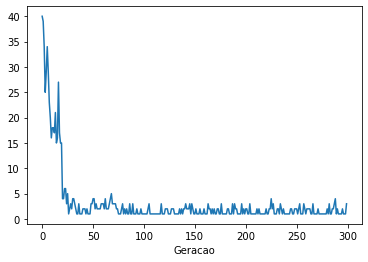

In [13]:
df.groupby("Geracao").count()["Area"].plot()

<AxesSubplot:xlabel='Geracao'>

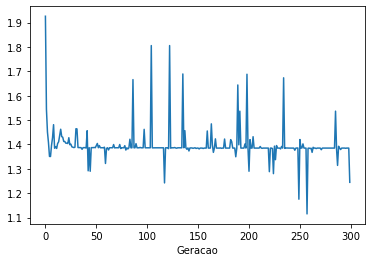

In [16]:
df.groupby("Geracao").mean()["Area"].plot()

<AxesSubplot:xlabel='Geracao'>

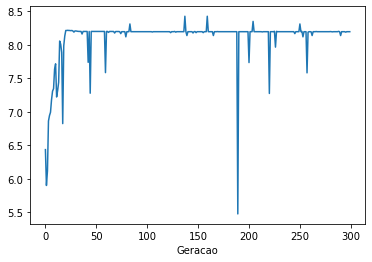

In [17]:
df.groupby("Geracao").mean()["Envergadura"].plot()

In [18]:
df[df["Geracao"]==299]

,Area,Corda,Envergadura,Geracao,Pontuacao,File
357,1.393606,0.253316,8.1948,299,22.685496,geracao_299_asa1.3936063500000002.avl
358,1.384939,0.252827,8.1948,299,22.731844,geracao_299_asa1.3849394700000002.avl
359,0.954829,0.255715,8.1948,299,12.875604,geracao_299_asa0.95482875.avl


<AxesSubplot:xlabel='Geracao'>

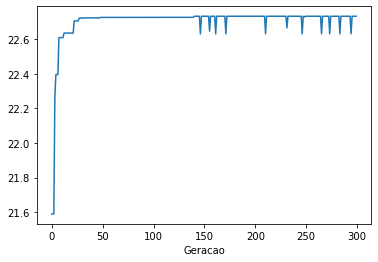

In [25]:
df.groupby("Geracao").max()["Pontuacao"].plot()